# Create convolutional neural network model

## Imports

In [2]:
from tflearn import DNN
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
from tflearn.data_utils import image_preloader

## Get dataset

image shape:  (224, 224, 3) Features:  2


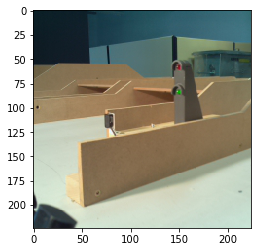

In [3]:
# Load path/class_id image file:
data_folder = 'images/crosslight'

# Build the preloader array, resize images to 320 x 240
X, y = image_preloader(data_folder, image_shape=(224, 224), mode='folder', categorical_labels=True, normalize=True, files_extension=['.jpg'])

# Show shape and features
print("image shape: ", X[0].shape, "Features: ", len(y[0]))

from matplotlib.pyplot import imshow
%matplotlib inline

imshow(X[79])

# Create train and test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Image augmentation
We use image augmentation to create a better training effect for real world situations. We randomly blur images and rotate them.

In [5]:
# Real-time data augmentation (This is only used while training the DNN)
img_aug = ImageAugmentation()
img_aug.add_random_blur(0.10)
img_aug.add_random_rotation(max_angle=15.0)

### Image preprocessing

In [6]:
# Real-time data preprocessing
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

### Convolutional neural network model

In [7]:
# Convolutional network building
network = input_data(shape=[None, 224, 224, 3],
                     data_augmentation=img_aug)
network = conv_2d(network, 32, 5, activation='relu', name="conv2d-1")
network = max_pool_2d(network, 2)
network = conv_2d(network, 32, 3, activation='relu', name="conv2d-2")
network = max_pool_2d(network, 2)
network = fully_connected(network, 96, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 96, activation='relu')
network = fully_connected(network, 2, activation='softmax')
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

model = DNN(network, tensorboard_verbose=0)

### Train the model and save it

In [8]:
model.load('models/model_crosslight')

In [ ]:
# Start the trainig process
model.fit(X_train, y_train, n_epoch=100, shuffle=True, validation_set=0.1, show_metric=True, batch_size=8, validation_batch_size=32, run_id='ampel')

In [12]:
# Evaluate performance on test set
model.evaluate(X_test, y_test,  batch_size=8)

Exception in thread Thread-12:
Traceback (most recent call last):
  File "/Users/jandor/miniconda2/envs/tensorflow/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/Users/jandor/miniconda2/envs/tensorflow/lib/python3.5/threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/jandor/miniconda2/envs/tensorflow/lib/python3.5/site-packages/tflearn/data_flow.py", line 187, in fill_feed_dict_queue
    data = self.retrieve_data(batch_ids)
  File "/Users/jandor/miniconda2/envs/tensorflow/lib/python3.5/site-packages/tflearn/data_flow.py", line 222, in retrieve_data
    utils.slice_array(self.feed_dict[key], batch_ids)
  File "/Users/jandor/miniconda2/envs/tensorflow/lib/python3.5/site-packages/tflearn/utils.py", line 180, in slice_array
    return [x[start] for x in X]
  File "/Users/jandor/miniconda2/envs/tensorflow/lib/python3.5/site-packages/tflearn/utils.py", line 180, in <listcomp>
    return [x[start] for x in X]
IndexEr

[0.0]

In [17]:
print(np.around(model.predict(X_test), 3))

[[ 0.003       0.99699998]
 [ 0.          1.        ]
 [ 0.001       0.99900001]
 [ 0.99800003  0.002     ]
 [ 0.          1.        ]
 [ 0.98699999  0.013     ]
 [ 0.008       0.99199998]
 [ 1.          0.        ]
 [ 0.028       0.972     ]
 [ 0.005       0.995     ]
 [ 0.98900002  0.011     ]
 [ 0.009       0.991     ]
 [ 0.98900002  0.011     ]
 [ 0.99800003  0.002     ]
 [ 0.99599999  0.004     ]
 [ 0.98500001  0.015     ]
 [ 0.012       0.98799998]
 [ 0.017       0.98299998]
 [ 0.051       0.949     ]
 [ 0.98900002  0.011     ]
 [ 0.98799998  0.012     ]
 [ 0.98900002  0.011     ]
 [ 0.98000002  0.02      ]
 [ 0.97899997  0.021     ]
 [ 0.98400003  0.016     ]
 [ 0.006       0.99400002]
 [ 0.019       0.98100001]
 [ 1.          0.        ]
 [ 0.001       0.99900001]
 [ 0.004       0.99599999]
 [ 0.013       0.98699999]
 [ 0.98900002  0.011     ]]


In [18]:
print(y_test)

[array([ 0.,  1.]), array([ 0.,  1.]), array([ 0.,  1.]), array([ 1.,  0.]), array([ 0.,  1.]), array([ 1.,  0.]), array([ 0.,  1.]), array([ 1.,  0.]), array([ 0.,  1.]), array([ 0.,  1.]), array([ 1.,  0.]), array([ 0.,  1.]), array([ 1.,  0.]), array([ 1.,  0.]), array([ 1.,  0.]), array([ 1.,  0.]), array([ 0.,  1.]), array([ 0.,  1.]), array([ 0.,  1.]), array([ 1.,  0.]), array([ 1.,  0.]), array([ 1.,  0.]), array([ 1.,  0.]), array([ 1.,  0.]), array([ 1.,  0.]), array([ 0.,  1.]), array([ 0.,  1.]), array([ 1.,  0.]), array([ 0.,  1.]), array([ 0.,  1.]), array([ 0.,  1.]), array([ 1.,  0.])]


In [16]:
import numpy as np

In [ ]:
# Save the model
model.save('models/model_crosslight')

# Close the database connection
#h5f.close()